Candidato: Andrés Felipe Bolaños Acosta <br>
Tel: +5511973662765 <br>
Email: afb.acosta@gmail.com <br>
    

# Perguntas para serem trabalhadas em ferramentas a seu critério

Importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import psycopg2
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Carregando as tabelas

In [2]:
dim_medicos = pd.read_csv('medicos.csv', delimiter=(';'))
ft_prescricoes = pd.read_csv('prescricoes.csv', delimiter=(';'))
ft_membros = pd.read_csv('membros.csv', delimiter=(';'))
ft_visitados = pd.read_csv('visitados.csv', delimiter=(';'))

In [3]:
def format_date(year_month:str):
    #Formats a string to YYYY-MM-DD
    year = year_month[0:4]
    month = year_month[4:6]
    day = '01'
    date = year + '-' + month + '-' + day
    return date

# 1. ANALISE DOS DADOS

## Analisando base de dados geral (membros + membros)

### Analisando em função do tempo

In [4]:
frequencia_medicamentos = ft_prescricoes[['Mes_prescricao','Medicamento_prescrito']]
frequencia_medicamentos['Date'] = frequencia_medicamentos['Mes_prescricao'].apply(lambda x:format_date(str(x)))
frequencia_medicamentos['Date'] = pd.to_datetime(frequencia_medicamentos['Date'])

In [5]:
frequencia_medicamentos['Freq total'] = 1
frequencia_medicamentos['MEDICAMENTO A'] = frequencia_medicamentos['Medicamento_prescrito']\
                                           .apply(lambda x : 1 if x == 'MEDICAMENTO A' else 0)
frequencia_medicamentos['MEDICAMENTO B'] = frequencia_medicamentos['Medicamento_prescrito']\
                                           .apply(lambda x : 1 if x == 'MEDICAMENTO B' else 0)
frequencia_medicamentos['MEDICAMENTO C'] = frequencia_medicamentos['Medicamento_prescrito']\
                                           .apply(lambda x : 1 if x == 'MEDICAMENTO C' else 0)

In [6]:
frequencia_med_A = frequencia_medicamentos[['Date','MEDICAMENTO A']]      
frequencia_med_A = frequencia_med_A.groupby(['Date']).sum()

frequencia_med_B = frequencia_medicamentos[['Date','MEDICAMENTO B']]      
frequencia_med_B = frequencia_med_B.groupby(['Date']).sum()
    
frequencia_med_C = frequencia_medicamentos[['Date','MEDICAMENTO C']]      
frequencia_med_C = frequencia_med_C.groupby(['Date']).sum()

frequencia_medicamentos['Freq total'] = 1
frequencia_total = frequencia_medicamentos[['Date','Freq total']]
frequencia_total = frequencia_total.groupby(['Date']).sum()

Criando gráfico comparativo de numero de precrições totais 

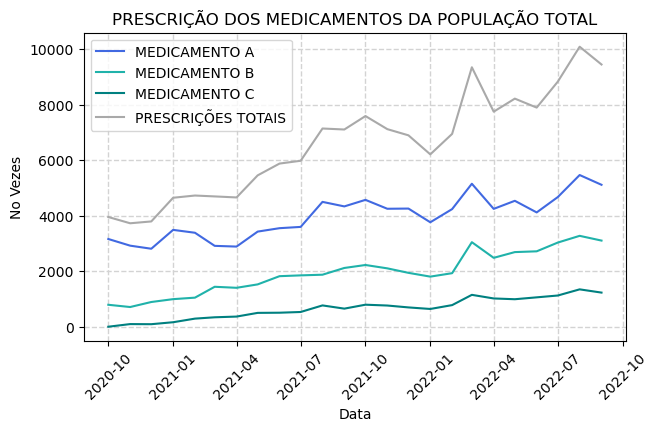

In [7]:
plt.figure(figsize = (7, 4))
plt.title("PRESCRIÇÃO DOS MEDICAMENTOS DA POPULAÇÃO TOTAL")
plt.xlabel("Data")
plt.ylabel("No Vezes")
    
x1 = frequencia_med_A.index
y1 = frequencia_med_A['MEDICAMENTO A']
    
x2 = frequencia_med_B.index
y2 = frequencia_med_B['MEDICAMENTO B']
    
x3 = frequencia_med_C.index
y3 = frequencia_med_C['MEDICAMENTO C']
    
x4 = frequencia_total.index
y4 = frequencia_total['Freq total']
    
plt.grid(color = 'lightgray' , linestyle = '--', lw = '1')
plt.plot(x1, y1, label="MEDICAMENTO A", color='royalblue')
plt.plot(x2, y2, label="MEDICAMENTO B", color='lightseagreen')
plt.plot(x3, y3, label="MEDICAMENTO C", color='teal')
plt.plot(x4, y4, label = "PRESCRIÇÕES TOTAIS", color='darkgray')
    
plt.legend()
plt.xticks(rotation = 45)
plt.show()


Criando gráfico da propoção da escolha

In [8]:
perc_med_A = frequencia_med_A['MEDICAMENTO A'] / frequencia_total['Freq total'] * 100
perc_med_B = frequencia_med_B['MEDICAMENTO B'] / frequencia_total['Freq total'] * 100
perc_med_C = frequencia_med_C['MEDICAMENTO C'] / frequencia_total['Freq total'] * 100

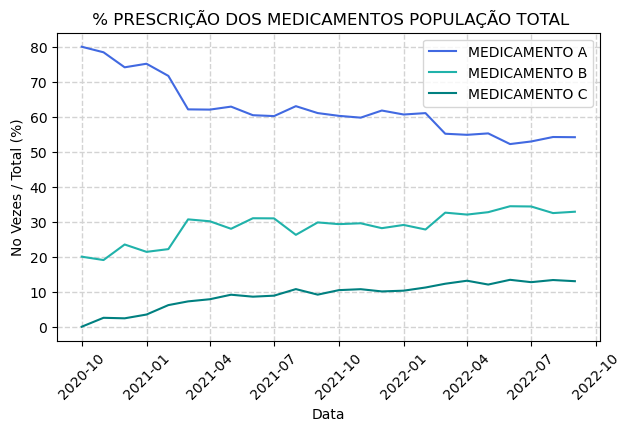

In [9]:
plt.figure(figsize = (7, 4))
plt.title(" % PRESCRIÇÃO DOS MEDICAMENTOS POPULAÇÃO TOTAL")
plt.xlabel("Data")
plt.ylabel("No Vezes / Total (%)")
    
x1 = perc_med_A.index
y1 = perc_med_A

x2 = perc_med_B.index
y2 = perc_med_B
    
x3 = perc_med_C.index
y3 = perc_med_C

    
plt.grid(color = 'lightgray' , linestyle = '--', lw = '1')
plt.plot(x1, y1, label="MEDICAMENTO A", color='royalblue')
plt.plot(x2, y2, label="MEDICAMENTO B", color='lightseagreen')
plt.plot(x3, y3, label="MEDICAMENTO C", color='teal')

    
plt.legend()
plt.xticks(rotation = 45)
plt.show()

### Analisando por região:

In [10]:
freq_medicamentos_regiao = ft_prescricoes[['Regiao','Medicamento_prescrito']]


In [11]:
medicamentos = freq_medicamentos_regiao.Medicamento_prescrito.unique()
for medicamento in medicamentos:
    freq_medicamentos_regiao[medicamento] = freq_medicamentos_regiao.Medicamento_prescrito\
                                            .apply(lambda x: 1 if x == medicamento else 0 )

freq_medicamentos_regiao =  freq_medicamentos_regiao.groupby(['Regiao']).sum()
freq_medicamentos_regiao ['Total'] = (freq_medicamentos_regiao['MEDICAMENTO A']
                                      + freq_medicamentos_regiao['MEDICAMENTO B']
                                      + freq_medicamentos_regiao['MEDICAMENTO C'])

In [12]:
perc_medicamentos_regiao = pd.DataFrame()
perc_medicamentos_regiao['MEDICAMENTO A'] = (freq_medicamentos_regiao['MEDICAMENTO A'] 
                                             / freq_medicamentos_regiao['Total'])
perc_medicamentos_regiao['MEDICAMENTO B'] = (freq_medicamentos_regiao['MEDICAMENTO B'] 
                                             / freq_medicamentos_regiao['Total'])
perc_medicamentos_regiao['MEDICAMENTO C'] = (freq_medicamentos_regiao['MEDICAMENTO C'] 
                                             / freq_medicamentos_regiao['Total'])
perc_medicamentos_regiao = perc_medicamentos_regiao * 100


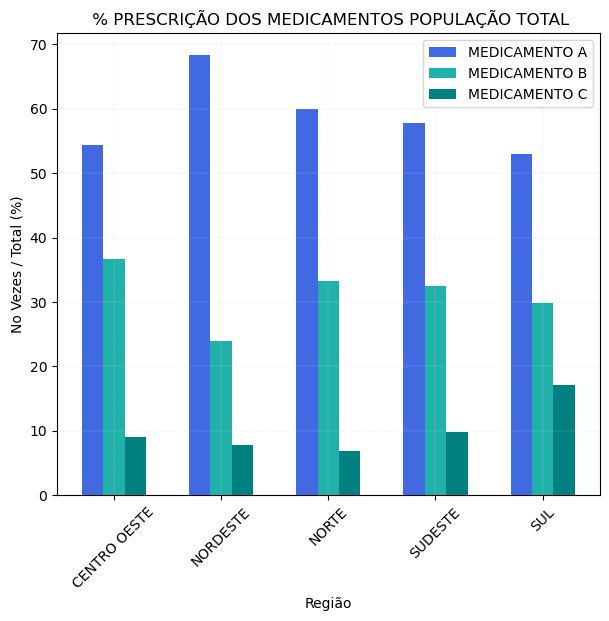

In [13]:
x = np.arange(5)
width = 0.2
y1 = perc_medicamentos_regiao['MEDICAMENTO A']
y2 = perc_medicamentos_regiao['MEDICAMENTO B']
y3 = perc_medicamentos_regiao['MEDICAMENTO C']

plt.figure(figsize = (7, 6))
plt.title(" % PRESCRIÇÃO DOS MEDICAMENTOS POPULAÇÃO TOTAL")
plt.bar(x-0.2, y1, width, color='royalblue')
plt.bar(x, y2, width, color='lightseagreen')
plt.bar(x+0.2, y3, width, color='teal')
plt.xticks(x, perc_medicamentos_regiao.index)
plt.xlabel("Região")
plt.ylabel("No Vezes / Total (%)")
plt.xticks(rotation = 45)
plt.legend(["MEDICAMENTO A", "MEDICAMENTO B", "MEDICAMENTO C"])
plt.grid(color = 'lightgray' , linestyle = '--', lw = '.2')
plt.show()

### Analisando por estado:

In [14]:
freq_medicamentos_UF = ft_prescricoes[['Estado','Medicamento_prescrito']]
for medicamento in medicamentos:
    freq_medicamentos_UF[medicamento] = freq_medicamentos_UF.Medicamento_prescrito\
                                        .apply(lambda x: 1 if x == medicamento else 0 )
freq_medicamentos_UF =  freq_medicamentos_UF.groupby(['Estado']).sum()
freq_medicamentos_UF['Total'] = (freq_medicamentos_UF['MEDICAMENTO A']
                                 + freq_medicamentos_UF['MEDICAMENTO B']
                                 + freq_medicamentos_UF['MEDICAMENTO C'])
perc_medicamentos_UF = pd.DataFrame()
perc_medicamentos_UF['MEDICAMENTO A'] = (freq_medicamentos_UF['MEDICAMENTO A'] 
                                             / freq_medicamentos_UF['Total'])
perc_medicamentos_UF['MEDICAMENTO B'] = (freq_medicamentos_UF['MEDICAMENTO B'] 
                                             / freq_medicamentos_UF['Total'])
perc_medicamentos_UF['MEDICAMENTO C'] = (freq_medicamentos_UF['MEDICAMENTO C'] 
                                             / freq_medicamentos_UF['Total'])
perc_medicamentos_UF = perc_medicamentos_UF * 100


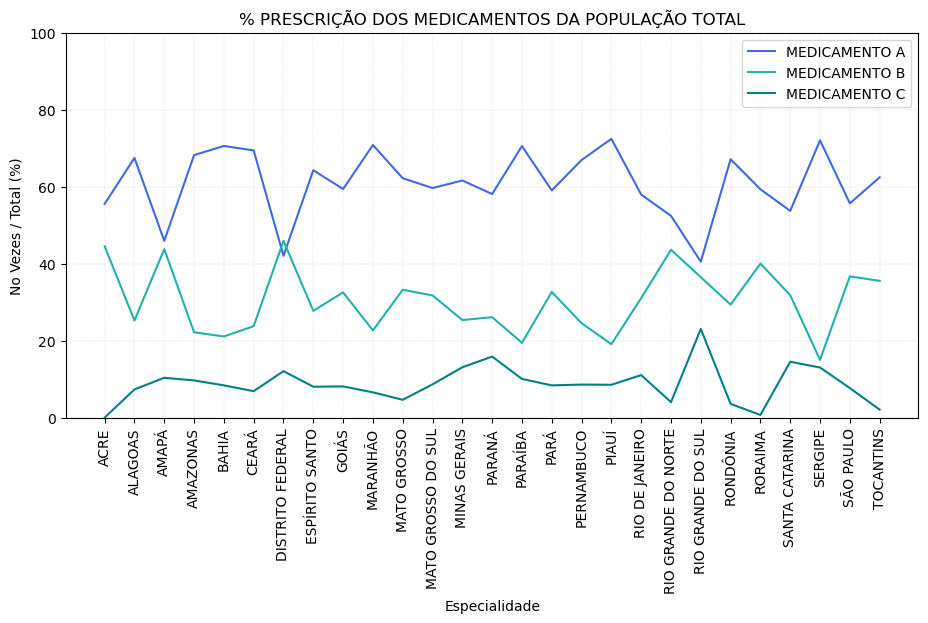

In [15]:
plt.figure(figsize = (11, 5))
plt.ylim(0, 100)
plt.title("% PRESCRIÇÃO DOS MEDICAMENTOS DA POPULAÇÃO TOTAL")
plt.xlabel("Especialidade")
plt.ylabel("No Vezes / Total (%)")
    
x1 = perc_medicamentos_UF.index
y1 = perc_medicamentos_UF['MEDICAMENTO A']

x2 = perc_medicamentos_UF.index
y2 = perc_medicamentos_UF['MEDICAMENTO B']
    
x3 = perc_medicamentos_UF.index
y3 = perc_medicamentos_UF['MEDICAMENTO C']

    
plt.grid(color='lightgray' , linestyle = '--', lw = '.3')
plt.plot(x1, y1, label="MEDICAMENTO A", color='royalblue')
plt.plot(x2, y2, label="MEDICAMENTO B", color='lightseagreen')
plt.plot(x3, y3, label="MEDICAMENTO C", color='teal')

    
plt.legend()
plt.xticks(rotation=90)
plt.show()

### Analisando por especialidade médica:

In [16]:
freq_medicamentos_especialde = ft_prescricoes[['Especialidade','Medicamento_prescrito']]

In [17]:
for medicamento in medicamentos:
    freq_medicamentos_especialde[medicamento] = freq_medicamentos_especialde.Medicamento_prescrito\
                                                .apply(lambda x: 1 if x == medicamento else 0 )

In [18]:
freq_medicamentos_especialde =  freq_medicamentos_especialde.groupby(['Especialidade']).sum()
freq_medicamentos_especialde['Total'] = (freq_medicamentos_especialde['MEDICAMENTO A']
                                         + freq_medicamentos_especialde['MEDICAMENTO B']
                                         + freq_medicamentos_especialde['MEDICAMENTO C'])

perc_medicamentos_especialde = pd.DataFrame()
perc_medicamentos_especialde['MEDICAMENTO A'] = (freq_medicamentos_especialde['MEDICAMENTO A'] 
                                                / freq_medicamentos_especialde['Total'])
perc_medicamentos_especialde['MEDICAMENTO B'] = (freq_medicamentos_especialde['MEDICAMENTO B'] 
                                             / freq_medicamentos_especialde['Total'])
perc_medicamentos_especialde['MEDICAMENTO C'] = (freq_medicamentos_especialde['MEDICAMENTO C'] 
                                             / freq_medicamentos_especialde['Total'])
perc_medicamentos_especialde = perc_medicamentos_especialde * 100


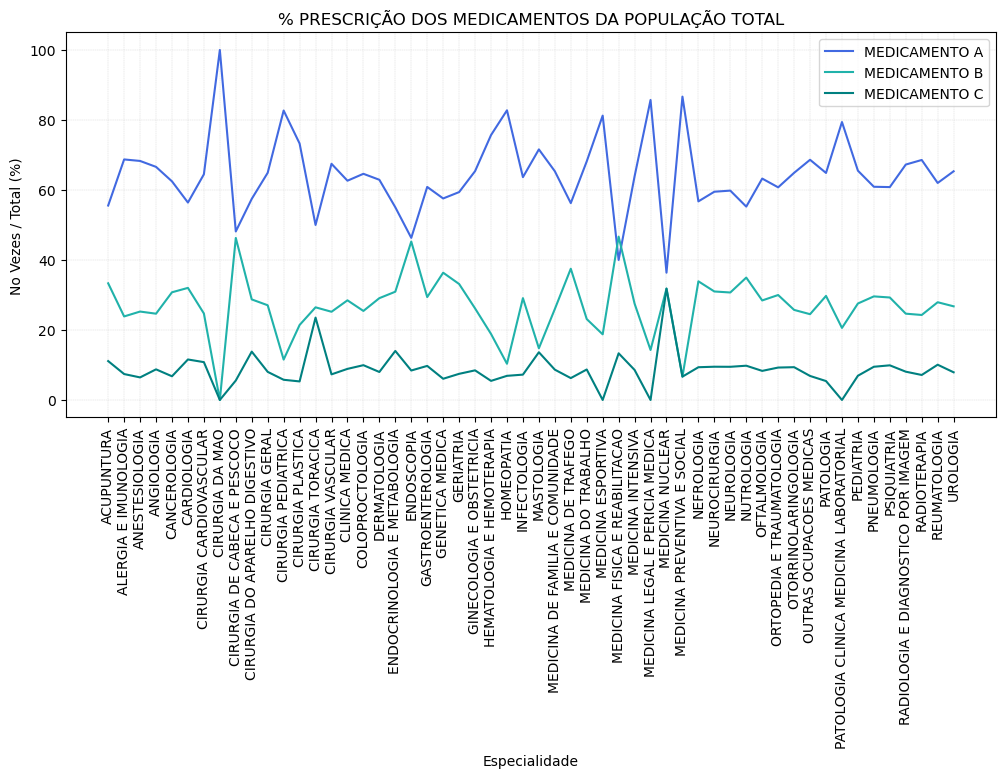

In [19]:
plt.figure(figsize = (12, 5))
plt.title("% PRESCRIÇÃO DOS MEDICAMENTOS DA POPULAÇÃO TOTAL")
plt.xlabel("Especialidade")
plt.ylabel("No Vezes / Total (%)")
    
x1 = perc_medicamentos_especialde.index
y1 = perc_medicamentos_especialde['MEDICAMENTO A']

x2 = perc_medicamentos_especialde.index
y2 = perc_medicamentos_especialde['MEDICAMENTO B']
    
x3 = perc_medicamentos_especialde.index
y3 = perc_medicamentos_especialde['MEDICAMENTO C']

    
plt.grid(color='lightgray' , linestyle = '--', lw = '.3')
plt.plot(x1, y1, label="MEDICAMENTO A", color='royalblue')
plt.plot(x2, y2, label="MEDICAMENTO B", color='lightseagreen')
plt.plot(x3, y3, label="MEDICAMENTO C", color='teal')

    
plt.legend()
plt.xticks(rotation=90)
plt.show()

### Analisando por ser ou não ser membro:

In [20]:
freq_membros_medicamento = ft_prescricoes
freq_membros_medicamento['membro'] = freq_membros_medicamento['ID_MEDICO'].apply(lambda x: 'Sim' if
                                                                                x in ft_membros['ID_MEDICO'].unique()
                                                                                else 'Não')

In [21]:
freq_membros_medicamento = freq_membros_medicamento[['membro', 'Medicamento_prescrito']]

In [22]:
for medicamento in medicamentos:
    freq_membros_medicamento[medicamento] = freq_membros_medicamento.Medicamento_prescrito\
                                            .apply(lambda x: 1 if x == medicamento else 0 )
freq_membros_medicamento =  freq_membros_medicamento.groupby(['membro']).sum()
freq_membros_medicamento['Total'] = (freq_membros_medicamento['MEDICAMENTO A']
                                    + freq_membros_medicamento['MEDICAMENTO B']
                                    + freq_membros_medicamento['MEDICAMENTO C'])

perc_membros_medicamento = pd.DataFrame()
perc_membros_medicamento['MEDICAMENTO A'] = (freq_membros_medicamento['MEDICAMENTO A'] 
                                             / freq_membros_medicamento['Total'])
perc_membros_medicamento['MEDICAMENTO B'] = (freq_membros_medicamento['MEDICAMENTO B'] 
                                             / freq_membros_medicamento['Total'])
perc_membros_medicamento['MEDICAMENTO C'] = (freq_membros_medicamento['MEDICAMENTO C'] 
                                             / freq_membros_medicamento['Total'])
perc_membros_medicamento = perc_membros_medicamento * 100

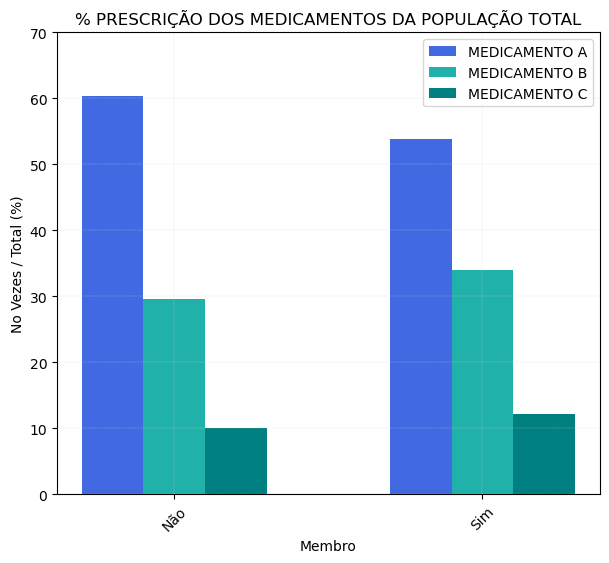

In [23]:
x = np.arange(2)
width = 0.2
y1 = perc_membros_medicamento['MEDICAMENTO A']
y2 = perc_membros_medicamento['MEDICAMENTO B']
y3 = perc_membros_medicamento['MEDICAMENTO C']

plt.figure(figsize = (7, 6))
plt.title("% PRESCRIÇÃO DOS MEDICAMENTOS DA POPULAÇÃO TOTAL")
plt.ylim(0, 70)
plt.bar(x-0.2, y1, width, color='royalblue')
plt.bar(x, y2, width, color='lightseagreen')
plt.bar(x+0.2, y3, width, color='teal')
plt.xticks(x, perc_membros_medicamento.index)
plt.xlabel("Membro")
plt.ylabel("No Vezes / Total (%)")
plt.xticks(rotation = 45)
plt.legend(["MEDICAMENTO A", "MEDICAMENTO B", "MEDICAMENTO C"])
plt.grid(color = 'lightgray' , linestyle = '--', lw = '.2')
plt.show()

### Analisando por ser ou não ser visitado:

In [24]:
dim_medicos.columns = ['ID_MEDICO', 'especialidades']

freq_visita_medicamento = pd.merge(dim_medicos, ft_prescricoes, 
                                   how='left', on='ID_MEDICO')
freq_visita_medicamento = pd.merge(freq_visita_medicamento, ft_visitados, 
                                   how='left', on='ID_MEDICO')
freq_visita_medicamento =  freq_visita_medicamento.loc[
                             (freq_visita_medicamento['VISITADO'] == 'SIM') 
                             | (freq_visita_medicamento['VISITADO'] == 'NÃO')]

In [25]:
freq_visita_medicamento = freq_visita_medicamento[['VISITADO', 'Medicamento_prescrito']]

for medicamento in medicamentos:
    freq_visita_medicamento[medicamento] = freq_visita_medicamento.Medicamento_prescrito\
                                           .apply(lambda x: 1 if x == medicamento else 0 )
freq_visita_medicamento =  freq_visita_medicamento.groupby(['VISITADO']).sum()
freq_visita_medicamento['Total'] = (freq_visita_medicamento['MEDICAMENTO A']
                                    + freq_visita_medicamento['MEDICAMENTO B']
                                    + freq_visita_medicamento['MEDICAMENTO C'])

perc_visita_medicamento = pd.DataFrame()
perc_visita_medicamento['MEDICAMENTO A'] = (freq_visita_medicamento['MEDICAMENTO A'] 
                                             / freq_visita_medicamento['Total'])
perc_visita_medicamento['MEDICAMENTO B'] = (freq_visita_medicamento['MEDICAMENTO B'] 
                                             / freq_visita_medicamento['Total'])
perc_visita_medicamento['MEDICAMENTO C'] = (freq_visita_medicamento['MEDICAMENTO C'] 
                                             / freq_visita_medicamento['Total'])
perc_visita_medicamento = perc_visita_medicamento * 100

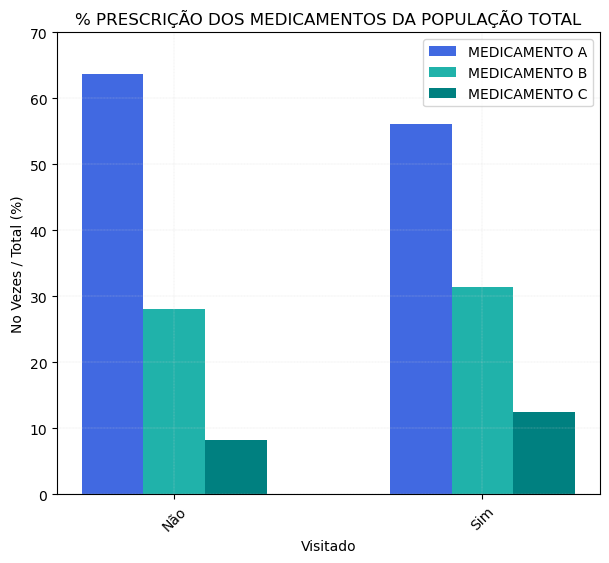

In [26]:
x = np.arange(2)
width = 0.2
y1 = perc_visita_medicamento['MEDICAMENTO A']
y2 = perc_visita_medicamento['MEDICAMENTO B']
y3 = perc_visita_medicamento['MEDICAMENTO C']

plt.figure(figsize = (7, 6))
plt.title("% PRESCRIÇÃO DOS MEDICAMENTOS DA POPULAÇÃO TOTAL")
plt.ylim(0, 70)
plt.bar(x-0.2, y1, width, color='royalblue')
plt.bar(x, y2, width, color='lightseagreen')
plt.bar(x+0.2, y3, width, color='teal')
plt.xticks(x, perc_membros_medicamento.index)
plt.xlabel("Visitado")
plt.ylabel("No Vezes / Total (%)")
plt.xticks(rotation = 45)
plt.legend(["MEDICAMENTO A", "MEDICAMENTO B", "MEDICAMENTO C"])
plt.grid(color = 'lightgray' , linestyle = '--', lw = '.2')
plt.show()

## ANALISANDO BASE DE DADOS  (MEMBROS E NÃO MEMBROS) SEPARADAMENTE

### Membros e relação com visitas:

In [27]:
mem_visita_meds = pd.merge(dim_medicos, ft_prescricoes, 
                                     how='left', on='ID_MEDICO')
mem_visita_meds = pd.merge(mem_visita_meds, ft_visitados, 
                            how='left', on='ID_MEDICO')
mem_visita_meds =  mem_visita_meds.loc[ (mem_visita_meds['VISITADO'] == 'SIM') 
                                      | (mem_visita_meds['VISITADO'] == 'NÃO')]

mem_visita_meds['membro'] = mem_visita_meds['ID_MEDICO'].apply(lambda x: 'Sim' 
                                                               if x in ft_membros['ID_MEDICO'].unique()
                                                               else 'Não')


In [28]:
yes_mem_visits_meds = mem_visita_meds.loc[(mem_visita_meds['membro'] == 'Sim')]

In [29]:
fr_yes_mem_visits_meds = yes_mem_visits_meds[['VISITADO', 'Medicamento_prescrito']]

In [30]:
fr_yes_mem_visits_meds = fr_yes_mem_visits_meds[['VISITADO', 'Medicamento_prescrito']]

for medicamento in medicamentos:
    fr_yes_mem_visits_meds[medicamento] = fr_yes_mem_visits_meds.Medicamento_prescrito\
                                          .apply(lambda x: 1 if x == medicamento else 0 )
fr_yes_mem_visits_meds =  fr_yes_mem_visits_meds.groupby(['VISITADO']).sum()
fr_yes_mem_visits_meds['Total'] = (fr_yes_mem_visits_meds['MEDICAMENTO A']
                                    + fr_yes_mem_visits_meds['MEDICAMENTO B']
                                    + fr_yes_mem_visits_meds['MEDICAMENTO C'])

perc_yes_mem_visits_meds = pd.DataFrame()
perc_yes_mem_visits_meds['MEDICAMENTO A'] = (fr_yes_mem_visits_meds['MEDICAMENTO A'] 
                                             / fr_yes_mem_visits_meds['Total'])
perc_yes_mem_visits_meds['MEDICAMENTO B'] = (fr_yes_mem_visits_meds['MEDICAMENTO B'] 
                                             / fr_yes_mem_visits_meds['Total'])
perc_yes_mem_visits_meds['MEDICAMENTO C'] = (fr_yes_mem_visits_meds['MEDICAMENTO C'] 
                                             / fr_yes_mem_visits_meds['Total'])
perc_yes_mem_visits_meds = perc_yes_mem_visits_meds * 100

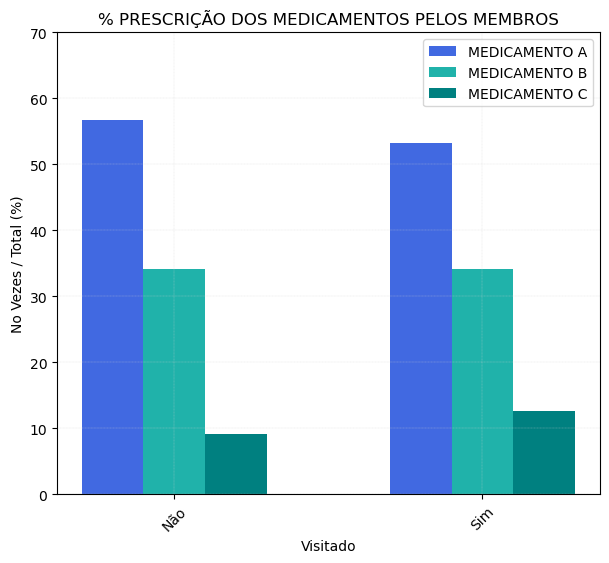

In [31]:
x = np.arange(2)
width = 0.2


y1 = perc_yes_mem_visits_meds['MEDICAMENTO A']
y2 = perc_yes_mem_visits_meds['MEDICAMENTO B']
y3 = perc_yes_mem_visits_meds['MEDICAMENTO C']

plt.figure(figsize = (7, 6))
plt.title("% PRESCRIÇÃO DOS MEDICAMENTOS PELOS MEMBROS")
plt.ylim(0, 70)
plt.bar(x-0.2, y1, width, color='royalblue')
plt.bar(x, y2, width, color='lightseagreen')
plt.bar(x+0.2, y3, width, color='teal')
plt.xticks(x, perc_membros_medicamento.index)
plt.xlabel("Visitado")
plt.ylabel("No Vezes / Total (%)")
plt.xticks(rotation = 45)
plt.legend(["MEDICAMENTO A", "MEDICAMENTO B", "MEDICAMENTO C"])
plt.grid(color = 'lightgray' , linestyle = '--', lw = '.2')
plt.show()

### Não membros e relação com visitas:

In [32]:
no_mem_visits_meds = mem_visita_meds.loc[(mem_visita_meds['membro'] == 'Não')]

In [33]:
no_mem_visits_meds = no_mem_visits_meds[['VISITADO', 'Medicamento_prescrito']]

In [34]:
fr_no_mem_visits_meds = no_mem_visits_meds[['VISITADO', 'Medicamento_prescrito']]

for medicamento in medicamentos:
    fr_no_mem_visits_meds[medicamento] = fr_no_mem_visits_meds.Medicamento_prescrito\
                                        .apply(lambda x: 1 if x == medicamento else 0)
fr_no_mem_visits_meds =  fr_no_mem_visits_meds.groupby(['VISITADO']).sum()
fr_no_mem_visits_meds['Total'] = (fr_no_mem_visits_meds['MEDICAMENTO A']
                                  + fr_no_mem_visits_meds['MEDICAMENTO B']
                                  + fr_no_mem_visits_meds['MEDICAMENTO C'])

perc_no_mem_visits_meds = pd.DataFrame()
perc_no_mem_visits_meds['MEDICAMENTO A'] = (fr_no_mem_visits_meds['MEDICAMENTO A'] 
                                             / fr_no_mem_visits_meds['Total'])
perc_no_mem_visits_meds['MEDICAMENTO B'] = (fr_no_mem_visits_meds['MEDICAMENTO B'] 
                                             / fr_no_mem_visits_meds['Total'])
perc_no_mem_visits_meds['MEDICAMENTO C'] = (fr_no_mem_visits_meds['MEDICAMENTO C'] 
                                             / fr_no_mem_visits_meds['Total'])
perc_no_mem_visits_meds = perc_no_mem_visits_meds * 100

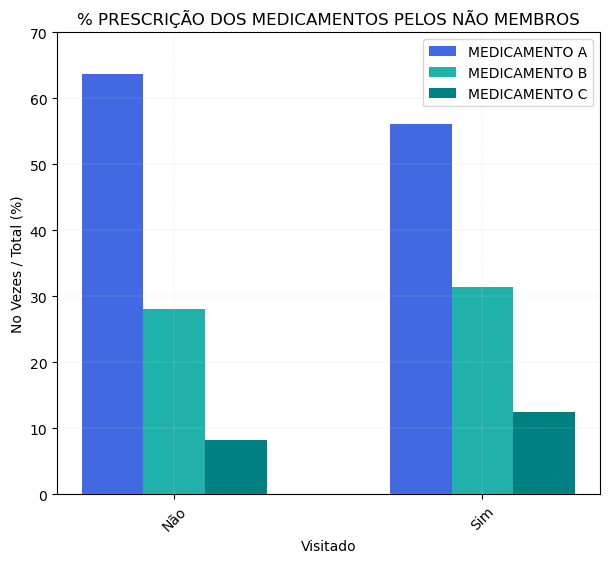

In [35]:
x = np.arange(2)
width = 0.2


y1 = perc_no_mem_visits_meds['MEDICAMENTO A']
y2 = perc_no_mem_visits_meds['MEDICAMENTO B']
y3 = perc_no_mem_visits_meds['MEDICAMENTO C']

plt.figure(figsize = (7, 6))
plt.title("% PRESCRIÇÃO DOS MEDICAMENTOS PELOS NÃO MEMBROS")
plt.ylim(0, 70)
plt.bar(x-0.2, y1, width, color='royalblue')
plt.bar(x, y2, width, color='lightseagreen')
plt.bar(x+0.2, y3, width, color='teal')
plt.xticks(x, perc_membros_medicamento.index)
plt.xlabel("Visitado")
plt.ylabel("No Vezes / Total (%)")
plt.xticks(rotation = 45)
plt.legend(["MEDICAMENTO A", "MEDICAMENTO B", "MEDICAMENTO C"])
plt.grid(color = 'lightgray' , linestyle = '--', lw = '.2')

### Membros e relação com a região:

In [36]:
members_meds = ft_prescricoes
members_meds['membro'] = members_meds['ID_MEDICO'].apply(lambda x: 'Sim' if
                                                         x in ft_membros['ID_MEDICO'].unique()
                                                         else 'Não')

In [37]:
yes_mem_meds = members_meds.loc[(members_meds['membro'] == 'Sim')]

In [38]:
yes_mem_reg_meds = yes_mem_meds[['Regiao', 'Medicamento_prescrito']]

In [39]:
fr_yes_mem_reg_meds = yes_mem_reg_meds[['Regiao', 'Medicamento_prescrito']]

for medicamento in medicamentos:
    fr_yes_mem_reg_meds[medicamento] = fr_yes_mem_reg_meds.Medicamento_prescrito\
                                       .apply(lambda x: 1 if x == medicamento else 0)
fr_yes_mem_reg_meds =  fr_yes_mem_reg_meds.groupby(['Regiao']).sum()
fr_yes_mem_reg_meds['Total'] = (fr_yes_mem_reg_meds['MEDICAMENTO A']
                                 + fr_yes_mem_reg_meds['MEDICAMENTO B']
                                 + fr_yes_mem_reg_meds['MEDICAMENTO C'])

perc_yes_mem_reg_meds = pd.DataFrame()
perc_yes_mem_reg_meds['MEDICAMENTO A'] = (fr_yes_mem_reg_meds['MEDICAMENTO A'] 
                                          / fr_yes_mem_reg_meds['Total'])
perc_yes_mem_reg_meds['MEDICAMENTO B'] = (fr_yes_mem_reg_meds['MEDICAMENTO B'] 
                                          / fr_yes_mem_reg_meds['Total'])
perc_yes_mem_reg_meds['MEDICAMENTO C'] = (fr_yes_mem_reg_meds['MEDICAMENTO C'] 
                                          / fr_yes_mem_reg_meds['Total'])
perc_yes_mem_reg_meds = perc_yes_mem_reg_meds * 100

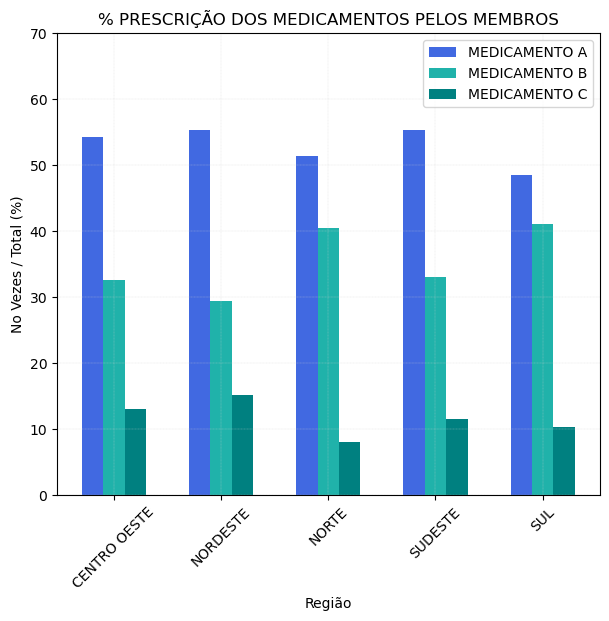

In [40]:
x = np.arange(5)
width = 0.2


y1 = perc_yes_mem_reg_meds['MEDICAMENTO A']
y2 = perc_yes_mem_reg_meds['MEDICAMENTO B']
y3 = perc_yes_mem_reg_meds['MEDICAMENTO C']

plt.figure(figsize = (7, 6))
plt.ylim(0, 70)
plt.title("% PRESCRIÇÃO DOS MEDICAMENTOS PELOS MEMBROS")
plt.bar(x-0.2, y1, width, color='royalblue')
plt.bar(x, y2, width, color='lightseagreen')
plt.bar(x+0.2, y3, width, color='teal')
plt.xticks(x, perc_medicamentos_regiao.index)
plt.xlabel("Região")
plt.ylabel("No Vezes / Total (%)")
plt.xticks(rotation = 45)
plt.legend(["MEDICAMENTO A", "MEDICAMENTO B", "MEDICAMENTO C"])
plt.grid(color = 'lightgray' , linestyle = '--', lw = '.2')
plt.show()

### Não membros e relação com visitas:

In [41]:
no_mem_meds = members_meds.loc[(members_meds['membro'] == 'Não')]


In [42]:
no_mem_reg_meds = no_mem_meds[['Regiao', 'Medicamento_prescrito']]


In [43]:
fr_no_mem_reg_meds = no_mem_reg_meds[['Regiao', 'Medicamento_prescrito']]

for medicamento in medicamentos:
    fr_no_mem_reg_meds[medicamento] = fr_no_mem_reg_meds.Medicamento_prescrito\
                                       .apply(lambda x: 1 if x == medicamento else 0)
fr_no_mem_reg_meds =  fr_no_mem_reg_meds.groupby(['Regiao']).sum()
fr_no_mem_reg_meds['Total'] = (fr_no_mem_reg_meds['MEDICAMENTO A']
                                + fr_no_mem_reg_meds['MEDICAMENTO B']
                                + fr_no_mem_reg_meds['MEDICAMENTO C'])

perc_no_mem_reg_meds = pd.DataFrame()
perc_no_mem_reg_meds['MEDICAMENTO A'] = (fr_no_mem_reg_meds['MEDICAMENTO A'] 
                                         / fr_no_mem_reg_meds['Total'])
perc_no_mem_reg_meds['MEDICAMENTO B'] = (fr_no_mem_reg_meds['MEDICAMENTO B'] 
                                         / fr_no_mem_reg_meds['Total'])
perc_no_mem_reg_meds['MEDICAMENTO C'] = (fr_yes_mem_reg_meds['MEDICAMENTO C'] 
                                         / fr_yes_mem_reg_meds['Total'])
perc_no_mem_reg_meds = perc_no_mem_reg_meds * 100

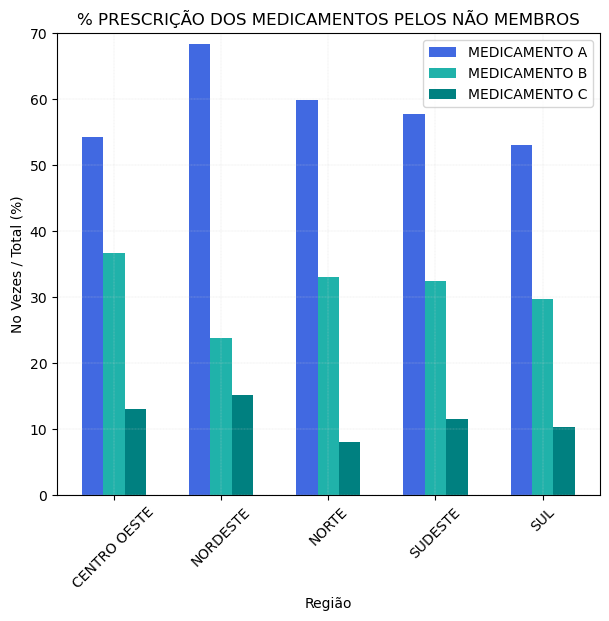

In [44]:
x = np.arange(5)
width = 0.2


y1 = perc_no_mem_reg_meds['MEDICAMENTO A']
y2 = perc_no_mem_reg_meds['MEDICAMENTO B']
y3 = perc_no_mem_reg_meds['MEDICAMENTO C']

plt.figure(figsize = (7, 6))
plt.ylim(0, 70)
plt.title("% PRESCRIÇÃO DOS MEDICAMENTOS PELOS NÃO MEMBROS")
plt.bar(x-0.2, y1, width, color='royalblue')
plt.bar(x, y2, width, color='lightseagreen')
plt.bar(x+0.2, y3, width, color='teal')
plt.xticks(x, perc_medicamentos_regiao.index)
plt.xlabel("Região")
plt.ylabel("No Vezes / Total (%)")
plt.xticks(rotation = 45)
plt.legend(["MEDICAMENTO A", "MEDICAMENTO B", "MEDICAMENTO C"])
plt.grid(color = 'lightgray' , linestyle = '--', lw = '.2')
plt.show()

### Membros e e relação com especialidade

In [45]:
yes_mem_esp_meds = yes_mem_meds[['Especialidade', 'Medicamento_prescrito']]

In [46]:
fr_yes_mem_esp_meds = yes_mem_esp_meds[['Especialidade', 'Medicamento_prescrito']]

for medicamento in medicamentos:
    fr_yes_mem_esp_meds[medicamento] = fr_yes_mem_esp_meds.Medicamento_prescrito\
                                       .apply(lambda x: 1 if x == medicamento else 0)
fr_yes_mem_esp_meds = fr_yes_mem_esp_meds.groupby(['Especialidade']).sum()
fr_yes_mem_esp_meds['Total'] = (fr_yes_mem_esp_meds['MEDICAMENTO A']
                                + fr_yes_mem_esp_meds['MEDICAMENTO B']
                                + fr_yes_mem_esp_meds['MEDICAMENTO C'])

perc_yes_mem_esp_meds = pd.DataFrame()
perc_yes_mem_esp_meds['MEDICAMENTO A'] = (fr_yes_mem_esp_meds['MEDICAMENTO A'] 
                                         / fr_yes_mem_esp_meds['Total'])
perc_yes_mem_esp_meds['MEDICAMENTO B'] = (fr_yes_mem_esp_meds['MEDICAMENTO B'] 
                                         / fr_yes_mem_esp_meds['Total'])
perc_yes_mem_esp_meds['MEDICAMENTO C'] = (fr_yes_mem_esp_meds['MEDICAMENTO C'] 
                                         / fr_yes_mem_esp_meds['Total'])
perc_yes_mem_esp_meds = perc_yes_mem_esp_meds * 100

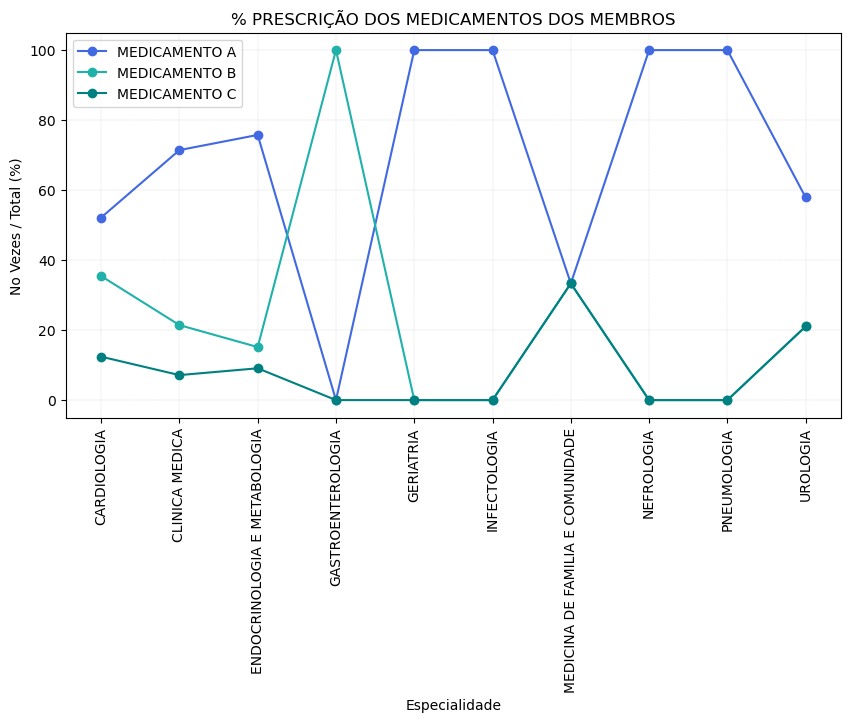

In [47]:
plt.figure(figsize = (10, 5))
plt.title("% PRESCRIÇÃO DOS MEDICAMENTOS DOS MEMBROS")
plt.xlabel("Especialidade")
plt.ylabel("No Vezes / Total (%)")
    
x1 = perc_yes_mem_esp_meds.index
y1 = perc_yes_mem_esp_meds['MEDICAMENTO A']

x2 = perc_yes_mem_esp_meds.index
y2 = perc_yes_mem_esp_meds['MEDICAMENTO B']
    
x3 = perc_yes_mem_esp_meds.index
y3 = perc_yes_mem_esp_meds['MEDICAMENTO C']

    
plt.grid(color='lightgray' , linestyle = '--', lw = '.3')
plt.plot(x1, y1, label="MEDICAMENTO A", color='royalblue', marker='o')
plt.plot(x2, y2, label="MEDICAMENTO B", color='lightseagreen', marker='o')
plt.plot(x3, y3, label="MEDICAMENTO C", color='teal', marker='o')

    
plt.legend()
plt.xticks(rotation=90)
plt.show()

### Não membros e relação especialidade

In [48]:
no_mem_esp_meds = no_mem_meds[['Especialidade', 'Medicamento_prescrito']]

In [49]:
fr_no_mem_esp_meds = no_mem_esp_meds[['Especialidade', 'Medicamento_prescrito']]

for medicamento in medicamentos:
    fr_no_mem_esp_meds[medicamento] = fr_no_mem_esp_meds.Medicamento_prescrito\
                                      .apply(lambda x: 1 if x == medicamento else 0)
fr_no_mem_esp_meds = fr_no_mem_esp_meds.groupby(['Especialidade']).sum()
fr_no_mem_esp_meds['Total'] = (fr_no_mem_esp_meds['MEDICAMENTO A']
                                + fr_no_mem_esp_meds['MEDICAMENTO B']
                                + fr_no_mem_esp_meds['MEDICAMENTO C'])

perc_no_mem_esp_meds = pd.DataFrame()
perc_no_mem_esp_meds['MEDICAMENTO A'] = (fr_no_mem_esp_meds['MEDICAMENTO A'] 
                                         / fr_no_mem_esp_meds['Total'])
perc_no_mem_esp_meds['MEDICAMENTO B'] = (fr_no_mem_esp_meds['MEDICAMENTO B'] 
                                         / fr_no_mem_esp_meds['Total'])
perc_no_mem_esp_meds['MEDICAMENTO C'] = (fr_no_mem_esp_meds['MEDICAMENTO C'] 
                                         / fr_no_mem_esp_meds['Total'])
perc_no_mem_esp_meds = perc_no_mem_esp_meds * 100

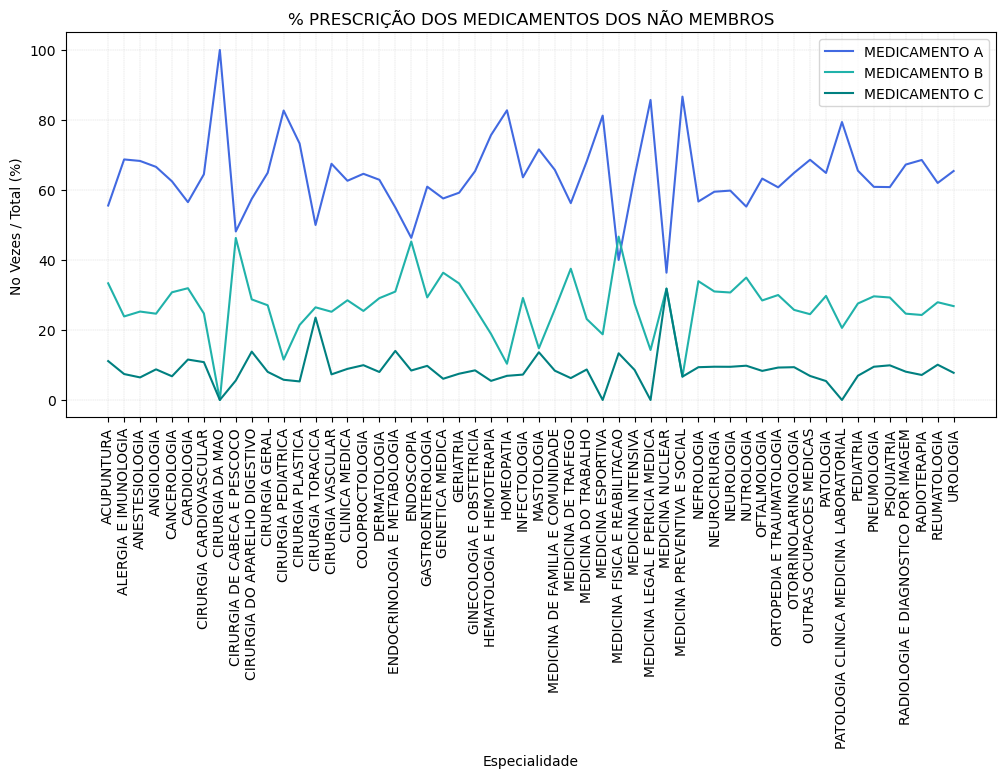

In [50]:
plt.figure(figsize = (12, 5))
plt.title("% PRESCRIÇÃO DOS MEDICAMENTOS DOS NÃO MEMBROS")
plt.xlabel("Especialidade")
plt.ylabel("No Vezes / Total (%)")
    
x1 = perc_no_mem_esp_meds.index
y1 = perc_no_mem_esp_meds['MEDICAMENTO A']

x2 = perc_no_mem_esp_meds.index
y2 = perc_no_mem_esp_meds['MEDICAMENTO B']
    
x3 = perc_no_mem_esp_meds.index
y3 = perc_no_mem_esp_meds['MEDICAMENTO C']

    
plt.grid(color='lightgray' , linestyle = '--', lw = '.3')
plt.plot(x1, y1, label="MEDICAMENTO A", color='royalblue')
plt.plot(x2, y2, label="MEDICAMENTO B", color='lightseagreen')
plt.plot(x3, y3, label="MEDICAMENTO C", color='teal')

    
plt.legend()
plt.xticks(rotation=90)
plt.show()

###  Membros ao longo do tempo

In [51]:
yes_mem_temp_meds = yes_mem_meds[['Mes_prescricao', 'Medicamento_prescrito']]

In [52]:
yes_mem_temp_meds['Date'] = yes_mem_temp_meds['Mes_prescricao'].apply(lambda x:format_date(str(x)))
yes_mem_temp_meds['Date'] = pd.to_datetime(yes_mem_temp_meds['Date'])

yes_mem_temp_meds['Freq total'] = 1
yes_mem_temp_meds['MEDICAMENTO A'] = yes_mem_temp_meds['Medicamento_prescrito']\
                                     .apply(lambda x : 1 if x == 'MEDICAMENTO A' else 0)
yes_mem_temp_meds['MEDICAMENTO B'] = yes_mem_temp_meds['Medicamento_prescrito']\
                                     .apply(lambda x : 1 if x == 'MEDICAMENTO B' else 0)
yes_mem_temp_meds['MEDICAMENTO C'] = yes_mem_temp_meds['Medicamento_prescrito']\
                                     .apply(lambda x : 1 if x == 'MEDICAMENTO C' else 0)

In [53]:
yes_mem_med_A = yes_mem_temp_meds[['Date','MEDICAMENTO A']]      
yes_mem_med_A = yes_mem_temp_meds.groupby(['Date']).sum()

yes_mem_med_B = yes_mem_temp_meds[['Date','MEDICAMENTO B']]      
yes_mem_med_B = yes_mem_temp_meds.groupby(['Date']).sum()
    
yes_mem_med_C = yes_mem_temp_meds[['Date','MEDICAMENTO C']]      
yes_mem_med_C = yes_mem_temp_meds.groupby(['Date']).sum()

yes_mem_temp_meds['Freq total'] = 1
yes_mem_med_total = yes_mem_temp_meds[['Date','Freq total']]
yes_mem_med_total = yes_mem_temp_meds.groupby(['Date']).sum()


In [54]:
perc_yes_mem_A = yes_mem_med_A['MEDICAMENTO A'] / yes_mem_med_total['Freq total'] * 100
perc_yes_mem_B = yes_mem_med_B['MEDICAMENTO B'] / yes_mem_med_total['Freq total'] * 100
perc_yes_mem_C = yes_mem_med_C['MEDICAMENTO C'] / yes_mem_med_total['Freq total'] * 100

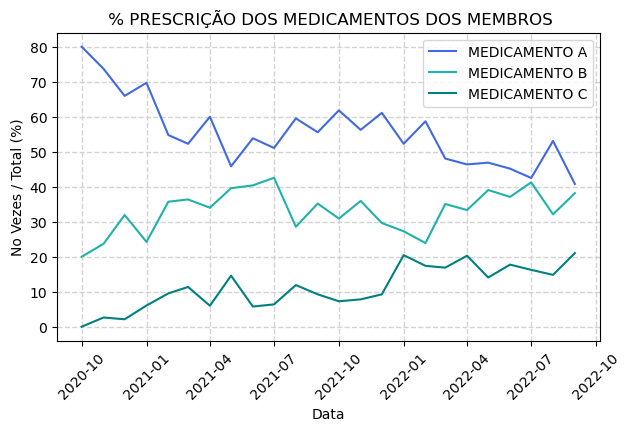

In [55]:
plt.figure(figsize = (7, 4))
plt.title(" % PRESCRIÇÃO DOS MEDICAMENTOS DOS MEMBROS")
plt.xlabel("Data")
plt.ylabel("No Vezes / Total (%)")
    
x1 = perc_yes_mem_A.index
y1 = perc_yes_mem_A

x2 = perc_yes_mem_B.index
y2 = perc_yes_mem_B
    
x3 = perc_yes_mem_C.index
y3 = perc_yes_mem_C

    
plt.grid(color = 'lightgray' , linestyle = '--', lw = '1')
plt.plot(x1, y1, label="MEDICAMENTO A", color='royalblue')
plt.plot(x2, y2, label="MEDICAMENTO B", color='lightseagreen')
plt.plot(x3, y3, label="MEDICAMENTO C", color='teal')

    
plt.legend()
plt.xticks(rotation = 45)
plt.show()

###  Não membros ao longo do tempo

In [56]:
no_mem_temp_meds = no_mem_meds[['Mes_prescricao', 'Medicamento_prescrito']]

In [57]:
no_mem_temp_meds['Date'] = no_mem_temp_meds['Mes_prescricao'].apply(lambda x:format_date(str(x)))
no_mem_temp_meds['Date'] = pd.to_datetime(no_mem_temp_meds['Date'])

no_mem_temp_meds['Freq total'] = 1
no_mem_temp_meds['MEDICAMENTO A'] = no_mem_temp_meds['Medicamento_prescrito']\
                                    .apply(lambda x : 1 if x == 'MEDICAMENTO A' else 0)
no_mem_temp_meds['MEDICAMENTO B'] = no_mem_temp_meds['Medicamento_prescrito']\
                                    .apply(lambda x : 1 if x == 'MEDICAMENTO B' else 0)
no_mem_temp_meds['MEDICAMENTO C'] = no_mem_temp_meds['Medicamento_prescrito']\
                                    .apply(lambda x : 1 if x == 'MEDICAMENTO C' else 0)

In [58]:
no_mem_med_A = no_mem_temp_meds[['Date','MEDICAMENTO A']]      
no_mem_med_A = no_mem_temp_meds.groupby(['Date']).sum()

no_mem_med_B = no_mem_temp_meds[['Date','MEDICAMENTO B']]      
no_mem_med_B = no_mem_temp_meds.groupby(['Date']).sum()
    
no_mem_med_C = no_mem_temp_meds[['Date','MEDICAMENTO C']]      
no_mem_med_C = no_mem_temp_meds.groupby(['Date']).sum()

no_mem_temp_meds['Freq total'] = 1
no_mem_med_total = no_mem_temp_meds[['Date','Freq total']]
no_mem_med_total = no_mem_temp_meds.groupby(['Date']).sum()

In [59]:
perc_no_mem_A = no_mem_med_A['MEDICAMENTO A'] / no_mem_med_total['Freq total'] * 100
perc_no_mem_B = no_mem_med_B['MEDICAMENTO B'] / no_mem_med_total['Freq total'] * 100
perc_no_mem_C = no_mem_med_C['MEDICAMENTO C'] / no_mem_med_total['Freq total'] * 100

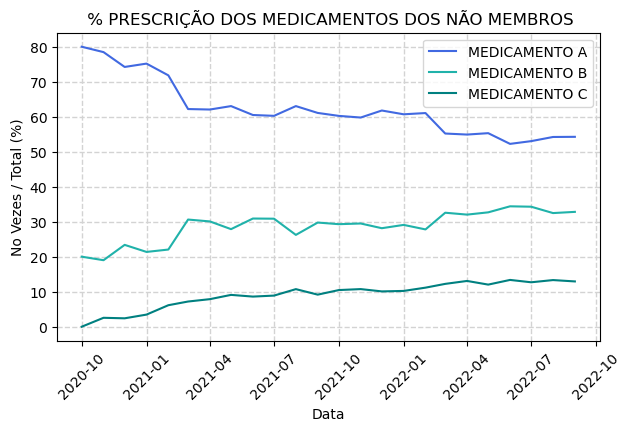

In [60]:
plt.figure(figsize = (7, 4))
plt.title(" % PRESCRIÇÃO DOS MEDICAMENTOS DOS NÃO MEMBROS")
plt.xlabel("Data")
plt.ylabel("No Vezes / Total (%)")
    
x1 = perc_no_mem_A.index
y1 = perc_no_mem_A

x2 = perc_no_mem_B.index
y2 = perc_no_mem_B
    
x3 = perc_no_mem_C.index
y3 = perc_no_mem_C

    
plt.grid(color = 'lightgray' , linestyle = '--', lw = '1')
plt.plot(x1, y1, label="MEDICAMENTO A", color='royalblue')
plt.plot(x2, y2, label="MEDICAMENTO B", color='lightseagreen')
plt.plot(x3, y3, label="MEDICAMENTO C", color='teal')

    
plt.legend()
plt.xticks(rotation = 45)
plt.show()

### Analisando os Mesmbros com relação ao cadastro 

Tratando a tabela de membros

In [61]:
def first_register(id_medico):
    dates = ft_membros.loc[(ft_membros['ID_MEDICO'] == id_medico)]
    date_register = min(dates['data_cadastro'])
    return date_register

In [62]:
ft_membros['date_register'] = ft_membros['ID_MEDICO'].apply(lambda x: first_register(x))
ft_membros = ft_membros.loc[(ft_membros['data_cadastro'] == ft_membros['date_register'])]
ft_membros['date_register'] = ft_membros['date_register'].apply(lambda x: str(x).replace('-', ""))
ft_membros['date_register'] = ft_membros['date_register'].apply(lambda x: format_date(x))
ft_membros['date_register'] = pd.to_datetime(ft_membros['date_register'])

In [63]:
join_members = pd.merge(dim_medicos, ft_prescricoes, how='left', on='ID_MEDICO')
join_members = pd.merge(join_members, ft_membros, how='left', on='ID_MEDICO')
join_members.dropna(inplace=True)
join_members['ano_mes'] = join_members['Mes_prescricao'].apply(lambda x: format_date(str(x)))
join_members['ano_mes'] = pd.to_datetime(join_members['ano_mes'])

In [64]:
join_members['from_join'] = join_members['ano_mes'] - join_members['date_register']

In [65]:
join_members['data_cadastro'].max()

'2022-09-30 16:50:13'

In [66]:
join_members['data_cadastro'].min()

'2022-09-08 13:47:41'

# 2. RELATÓRIO DE ACOMPANHAMENTO

## Evolução no tempo das prescrições dos membros

In [67]:
members = yes_mem_meds
members['Date'] = members['Mes_prescricao'].apply(lambda x: format_date(str(x)))
members['Date'] = pd.to_datetime(members['Date'])
members['freq'] = 1

In [68]:
visits_members = mem_visita_meds.loc[(mem_visita_meds['membro'] == 'Sim')]
visits_members['Date'] = visits_members['Mes_prescricao'].apply(lambda x: format_date(str(x)))
visits_members['Date'] = pd.to_datetime(visits_members['Date'])
visits_members['freq'] = 1
visits_members.reset_index(inplace=True)

### Geral

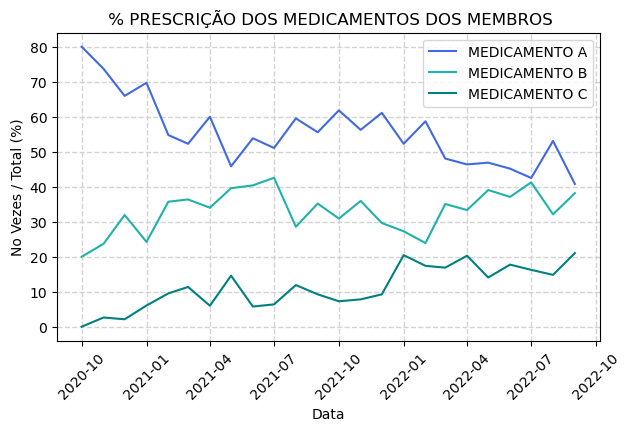

In [69]:
plt.figure(figsize = (7, 4))
plt.title(" % PRESCRIÇÃO DOS MEDICAMENTOS DOS MEMBROS")
plt.xlabel("Data")
plt.ylabel("No Vezes / Total (%)")
    
x1 = perc_yes_mem_A.index
y1 = perc_yes_mem_A

x2 = perc_yes_mem_B.index
y2 = perc_yes_mem_B
    
x3 = perc_yes_mem_C.index
y3 = perc_yes_mem_C

    
plt.grid(color = 'lightgray' , linestyle = '--', lw = '1')
plt.plot(x1, y1, label="MEDICAMENTO A", color='royalblue')
plt.plot(x2, y2, label="MEDICAMENTO B", color='lightseagreen')
plt.plot(x3, y3, label="MEDICAMENTO C", color='teal')

    
plt.legend()
plt.xticks(rotation = 45)
plt.show()

### Visitas:

In [70]:
visit = 'SIM'
visits_members = visits_members.loc[(visits_members['VISITADO'] == visit)]
visits_members = visits_members[['Date', 'Medicamento_prescrito', 'freq']]

for medicamento in medicamentos:
     visits_members[medicamento] = visits_members['Medicamento_prescrito'].apply(lambda x : 1 if x == medicamento else 0)

visits_members.drop(columns=['Medicamento_prescrito'], inplace=True)
visits_members = visits_members.groupby(by=['Date']).sum()

perc_member_visits = pd.DataFrame()
perc_member_visits['MEDICAMENTO A'] = visits_members['MEDICAMENTO A'] / visits_members['freq'] * 100
perc_member_visits['MEDICAMENTO B'] = visits_members['MEDICAMENTO B'] / visits_members['freq'] * 100
perc_member_visits['MEDICAMENTO C'] = visits_members['MEDICAMENTO C'] / visits_members['freq'] * 100

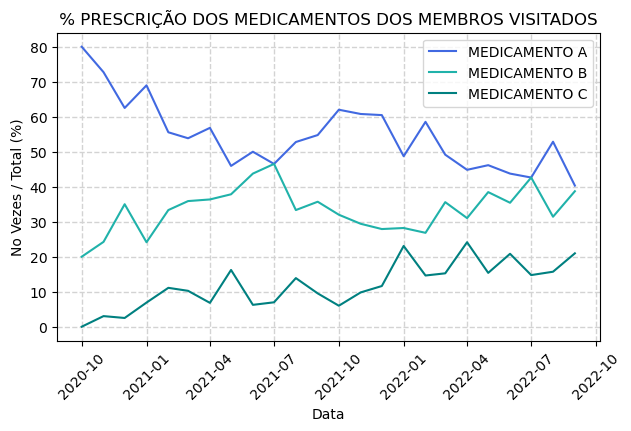

In [71]:
plt.figure(figsize = (7, 4))
plt.title(" % PRESCRIÇÃO DOS MEDICAMENTOS DOS MEMBROS VISITADOS ")
plt.xlabel("Data")
plt.ylabel("No Vezes / Total (%)")
    
x1 = perc_member_visits.index
y1 = perc_member_visits['MEDICAMENTO A']

x2 = perc_member_visits.index
y2 = perc_member_visits['MEDICAMENTO B']
    
x3 = perc_member_visits.index
y3 = perc_member_visits['MEDICAMENTO C']

    
plt.grid(color = 'lightgray' , linestyle = '--', lw = '1')
plt.plot(x1, y1, label="MEDICAMENTO A", color='royalblue')
plt.plot(x2, y2, label="MEDICAMENTO B", color='lightseagreen')
plt.plot(x3, y3, label="MEDICAMENTO C", color='teal')

    
plt.legend()
plt.xticks(rotation = 45)
plt.show()

### Região: 

In [86]:
reg = 'SUDESTE'
members_reg = members.loc[(members['Regiao'] == reg)]
members_reg = members_reg[['Date', 'Medicamento_prescrito', 'freq']]

for medicamento in medicamentos:
     members_reg[medicamento] = members_reg['Medicamento_prescrito'].apply(lambda x : 1 if x == medicamento else 0)

members_reg.drop(columns=['Medicamento_prescrito'], inplace=True)
members_reg = members_reg.groupby(by=['Date']).sum()

perc_member_reg = pd.DataFrame()
perc_member_reg['MEDICAMENTO A'] = members_reg['MEDICAMENTO A'] / members_reg['freq'] * 100
perc_member_reg['MEDICAMENTO B'] = members_reg['MEDICAMENTO B'] / members_reg['freq'] * 100
perc_member_reg['MEDICAMENTO C'] = members_reg['MEDICAMENTO C'] / members_reg['freq'] * 100


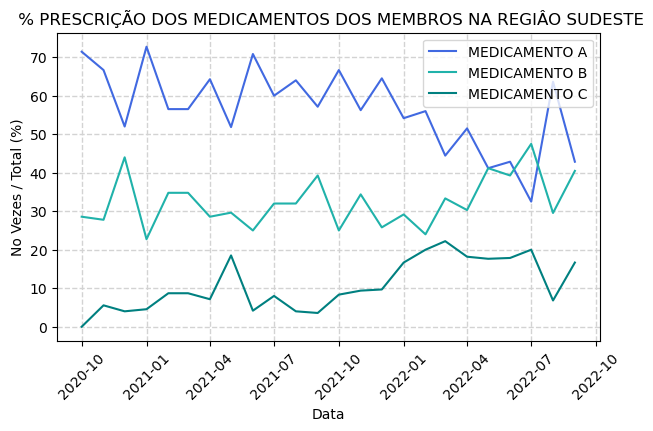

In [87]:
plt.figure(figsize = (7, 4))
plt.title(" % PRESCRIÇÃO DOS MEDICAMENTOS DOS MEMBROS NA REGIÂO " + reg)
plt.xlabel("Data")
plt.ylabel("No Vezes / Total (%)")
    
x1 = perc_member_reg.index
y1 = perc_member_reg['MEDICAMENTO A']

x2 = perc_member_reg.index
y2 = perc_member_reg['MEDICAMENTO B']
    
x3 = perc_member_reg.index
y3 = perc_member_reg['MEDICAMENTO C']

    
plt.grid(color = 'lightgray' , linestyle = '--', lw = '1')
plt.plot(x1, y1, label="MEDICAMENTO A", color='royalblue')
plt.plot(x2, y2, label="MEDICAMENTO B", color='lightseagreen')
plt.plot(x3, y3, label="MEDICAMENTO C", color='teal')

    
plt.legend()
plt.xticks(rotation = 45)
plt.show()

### Especialidade:

In [74]:
esp = 'CARDIOLOGIA'
members_esp = members.loc[(members['Especialidade'] == esp)]
members_esp = members_esp[['Date', 'Medicamento_prescrito', 'freq']]

for medicamento in medicamentos:
     members_esp[medicamento] = members_esp['Medicamento_prescrito'].apply(lambda x : 1 if x == medicamento else 0)

members_esp.drop(columns=['Medicamento_prescrito'], inplace=True)
members_esp = members_esp.groupby(by=['Date']).sum()

perc_member_esp = pd.DataFrame()
perc_member_esp['MEDICAMENTO A'] = members_esp['MEDICAMENTO A'] / members_esp['freq'] * 100
perc_member_esp['MEDICAMENTO B'] = members_esp['MEDICAMENTO B'] / members_esp['freq'] * 100
perc_member_esp['MEDICAMENTO C'] = members_esp['MEDICAMENTO C'] / members_esp['freq'] * 100

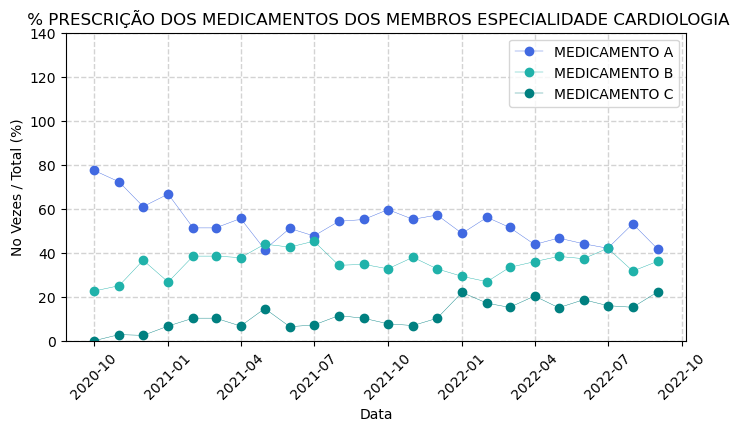

In [75]:
plt.figure(figsize = (8, 4))
plt.title(" % PRESCRIÇÃO DOS MEDICAMENTOS DOS MEMBROS ESPECIALIDADE " + esp)
plt.xlabel("Data")
plt.ylabel("No Vezes / Total (%)")
plt.ylim(0, 140)

x1 = perc_member_esp.index
y1 = perc_member_esp['MEDICAMENTO A']

x2 = perc_member_esp.index
y2 = perc_member_esp['MEDICAMENTO B']
    
x3 = perc_member_esp.index
y3 = perc_member_esp['MEDICAMENTO C']

    
plt.grid(color = 'lightgray' , linestyle = '--', lw = '1')
plt.plot(x1, y1, label="MEDICAMENTO A", color='royalblue', marker='o', lw = '0.3')
plt.plot(x2, y2, label="MEDICAMENTO B", color='lightseagreen', marker='o',  lw = '0.3')
plt.plot(x3, y3, label="MEDICAMENTO C", color='teal', marker='o', lw = '0.3')

    
plt.legend()
plt.xticks(rotation = 45)
plt.show()

## Comparação com os não membros

### Geral

In [76]:
perc_membros_medicamentoT = perc_membros_medicamento.T

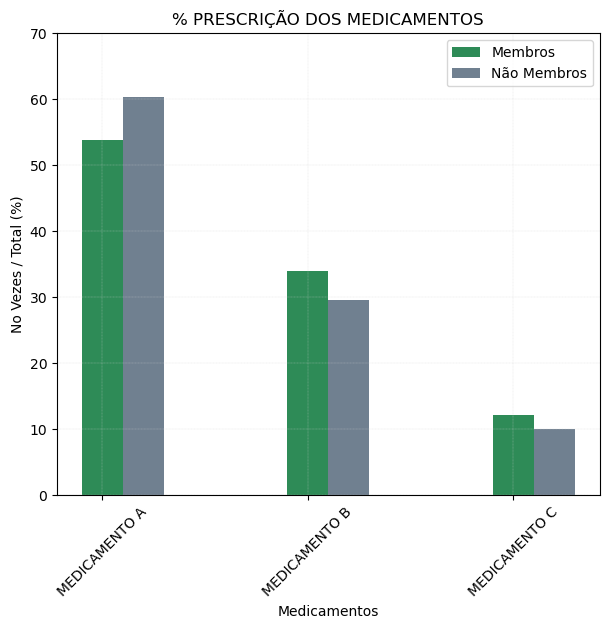

In [89]:
x = np.arange(3)
width = 0.2
y1 = perc_membros_medicamentoT['Sim']
y2 = perc_membros_medicamentoT['Não']


plt.figure(figsize = (7, 6))
plt.title("% PRESCRIÇÃO DOS MEDICAMENTOS")
plt.ylim(0, 70)
plt.bar(x-0.0, y1, width, color='seagreen')
plt.bar(x+0.2, y2, width, color='slategrey')
plt.xticks(x, perc_membros_medicamentoT.index)
plt.xlabel("Medicamentos")
plt.ylabel("No Vezes / Total (%)")
plt.xticks(rotation = 45)
plt.legend(["Membros", "Não Membros"])
plt.grid(color = 'lightgray' , linestyle = '--', lw = '.2')
plt.show()

### Visitas

In [78]:
delta_visits = perc_yes_mem_visits_meds - perc_no_mem_visits_meds

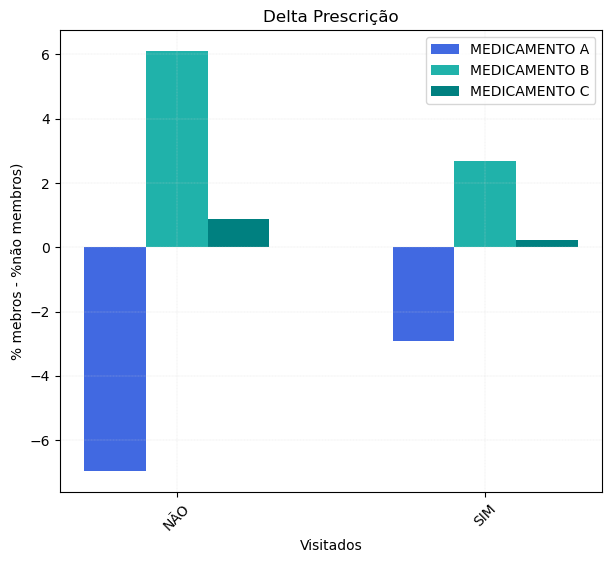

In [79]:
x = np.arange(2)
width = 0.2


y1 = delta_visits['MEDICAMENTO A']
y2 = delta_visits['MEDICAMENTO B']
y3 = delta_visits['MEDICAMENTO C']

plt.figure(figsize = (7, 6))
#plt.ylim(0, 70)
plt.title("Delta Prescrição")
plt.bar(x-0.2, y1, width, color='royalblue')
plt.bar(x, y2, width, color='lightseagreen')
plt.bar(x+0.2, y3, width, color='teal')
plt.xticks(x, delta_visits.index)
plt.xlabel("Visitados")
plt.ylabel("% mebros - %não membros)")
plt.xticks(rotation = 45)
plt.legend(["MEDICAMENTO A", "MEDICAMENTO B", "MEDICAMENTO C"])
plt.grid(color = 'lightgray' , linestyle = '--', lw = '.2')
plt.show()

### Região

In [80]:
delta_regiao = perc_yes_mem_reg_meds - perc_no_mem_reg_meds

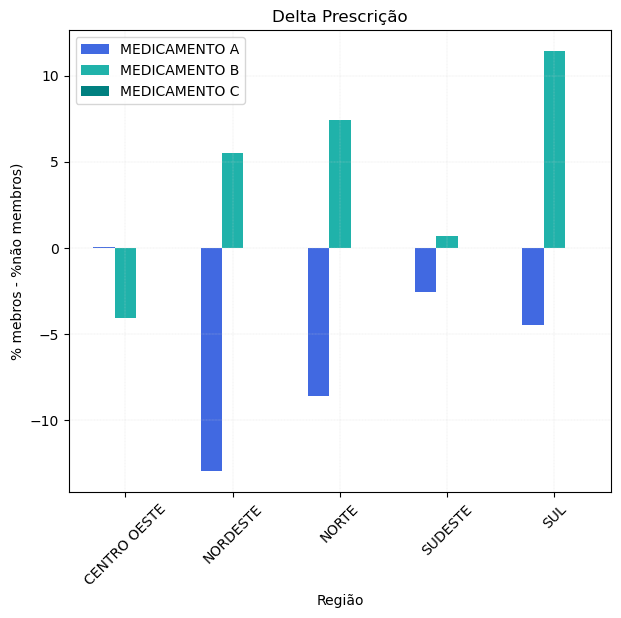

In [81]:
x = np.arange(5)
width = 0.2


y1 = delta_regiao['MEDICAMENTO A']
y2 = delta_regiao['MEDICAMENTO B']
y3 = delta_regiao['MEDICAMENTO C']

plt.figure(figsize = (7, 6))
#plt.ylim(0, 70)
plt.title("Delta Prescrição")
plt.bar(x-0.2, y1, width, color='royalblue')
plt.bar(x, y2, width, color='lightseagreen')
plt.bar(x+0.2, y3, width, color='teal')
plt.xticks(x, delta_regiao.index)
plt.xlabel("Região")
plt.ylabel("% mebros - %não membros)")
plt.xticks(rotation = 45)
plt.legend(["MEDICAMENTO A", "MEDICAMENTO B", "MEDICAMENTO C"])
plt.grid(color = 'lightgray' , linestyle = '--', lw = '.2')
plt.show()

### Especialidade

In [82]:
delta_esp = perc_yes_mem_esp_meds - perc_no_mem_esp_meds
delta_esp.dropna(inplace=True)

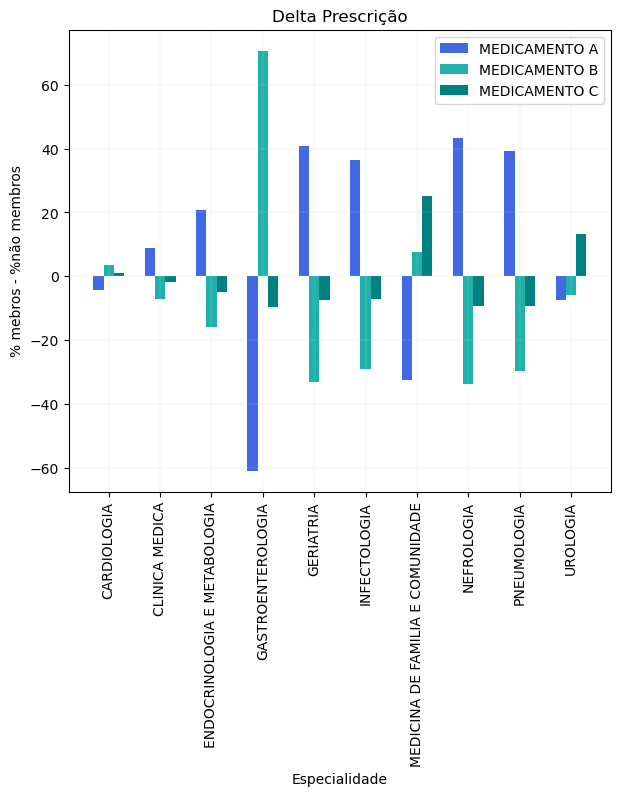

In [83]:
x = np.arange(10)
width = 0.2


y1 = delta_esp['MEDICAMENTO A']
y2 = delta_esp['MEDICAMENTO B']
y3 = delta_esp['MEDICAMENTO C']

plt.figure(figsize = (7, 6))
plt.title("Delta Prescrição")
plt.bar(x-0.2, y1, width, color='royalblue')
plt.bar(x, y2, width, color='lightseagreen')
plt.bar(x+0.2, y3, width, color='teal')
plt.xticks(x, delta_esp.index)
plt.xlabel("Especialidade")
plt.ylabel("% mebros - %não membros")
plt.xticks(rotation = 90)
plt.legend(["MEDICAMENTO A", "MEDICAMENTO B", "MEDICAMENTO C"])
plt.grid(color = 'lightgray' , linestyle = '--', lw = '.2')
plt.show()